# **People Training**

---


## Installing Dependencies

In [1]:
# nvidia GPU
!nvidia-smi

Sat Jun 14 20:08:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
%pip install ultralytics

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download

We loaded the YOLO model (yolo11n.pt) to prepare it for training with the annotated dataset we had previously created and exported (from Grounding DINO + Roboflow inspection)

In [5]:
import os
from ultralytics import YOLO

path_dataset = 'models/datasets/Eyes Project 4 v1'

model = YOLO('yolo11n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 129MB/s]


We trained for 60 epochs because of computing resources constraints. We define the image size of 640 which is the standard with which YOLO works and patience of 10 for early stopping to be activated.

In [26]:
model.train(
    data = path_dataset+'/data.yaml',
    epochs=60,
    imgsz=640,
    batch=16,
    name='people_detector_final',
    project='models/training_results',  # Add this line to save to our structure
    patience=30
)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Eyes Project 4 v1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=people_detector_final, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Eyes Project 4 v1/train/labels.cache... 96 images, 11 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 27.9±15.9 MB/s, size: 61.9 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Eyes Project 4 v1/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/people_detector_final/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/people_detector_final
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.36G      2.941        2.8      2.749         75        640: 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         16         32      0.122      0.125     0.0881     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.36G      2.871      2.485      2.604         70        640: 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         16         32     0.0202      0.719      0.111     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.37G      2.554      2.213      2.348         63        640: 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         16         32     0.0782      0.281     0.0547     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.37G      2.176      2.004      2.136         78        640: 100%|██████████| 6/6 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         16         32      0.222     0.0938      0.132     0.0298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.37G      2.002       1.91      2.012         69        640: 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         16         32      0.764       0.25      0.273     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.37G      1.892      1.803      1.953         85        640: 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         16         32      0.652      0.312       0.34     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.37G       1.79      1.693      1.847        102        640: 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         16         32      0.704      0.372      0.396      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.37G      1.571      1.626      1.776        103        640: 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all         16         32      0.873      0.429      0.552      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.38G      1.525      1.596      1.737         67        640: 100%|██████████| 6/6 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


                   all         16         32      0.791      0.355      0.426      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.38G      1.571      1.544      1.744        102        640: 100%|██████████| 6/6 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         16         32      0.701      0.439      0.551      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.38G      1.466      1.485      1.693         66        640: 100%|██████████| 6/6 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         16         32      0.823      0.594      0.695      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.38G      1.517      1.465      1.677         69        640: 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         16         32      0.847      0.691        0.8      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.38G      1.401      1.392      1.608         82        640: 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         16         32      0.825      0.588      0.729      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.38G      1.373      1.342      1.614        110        640: 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         16         32      0.802      0.635      0.731      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.38G      1.318      1.286       1.62         75        640: 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         16         32      0.762      0.594      0.699      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.38G      1.325      1.278      1.545         93        640: 100%|██████████| 6/6 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         16         32      0.908      0.618      0.693      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.38G      1.398      1.328      1.594         78        640: 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         16         32      0.811       0.67      0.755      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.38G       1.24      1.219      1.504         88        640: 100%|██████████| 6/6 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         16         32      0.873       0.75      0.816      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.38G      1.245      1.191      1.517         65        640: 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         16         32      0.888      0.688      0.819      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.38G      1.185      1.151      1.453         99        640: 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         16         32      0.835      0.625      0.763      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.38G      1.209      1.162      1.481         77        640: 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         16         32      0.846      0.685      0.752      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.38G      1.137      1.147      1.456         59        640: 100%|██████████| 6/6 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         16         32      0.856      0.656      0.769      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.38G      1.139      1.125       1.48         80        640: 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         16         32      0.949      0.656        0.8      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.38G      1.146      1.129      1.421         97        640: 100%|██████████| 6/6 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all         16         32      0.913      0.781       0.86       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.38G      1.111      1.102      1.415         56        640: 100%|██████████| 6/6 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         16         32      0.947      0.812      0.887      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.38G      1.085      1.087      1.429         94        640: 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         16         32      0.923      0.812      0.869      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.38G      1.084      1.036      1.397         76        640: 100%|██████████| 6/6 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         16         32      0.958      0.717      0.845       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60       2.4G      1.043      1.043      1.342         68        640: 100%|██████████| 6/6 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         16         32          1      0.712      0.877      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.41G      1.017      1.018      1.349        103        640: 100%|██████████| 6/6 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         16         32      0.993      0.719      0.889      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      2.43G      0.985       1.01      1.353        101        640: 100%|██████████| 6/6 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         16         32        0.9       0.75      0.865       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.43G      1.061      1.028      1.395         62        640: 100%|██████████| 6/6 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         16         32      0.908      0.719      0.854       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.43G      1.009     0.9812      1.355        107        640: 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         16         32      0.845      0.781      0.861      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.43G       0.95     0.9305      1.319         85        640: 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         16         32      0.856      0.812      0.898      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.43G      0.949     0.9276      1.302        119        640: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         16         32      0.831      0.812      0.899      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.43G      1.029      1.011      1.347         85        640: 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         16         32      0.802      0.888      0.898        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.43G     0.9936     0.9993      1.331         76        640: 100%|██████████| 6/6 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         16         32      0.837       0.75      0.845      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.43G     0.9363     0.9498       1.33         67        640: 100%|██████████| 6/6 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all         16         32       0.75      0.845      0.839      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.43G     0.9091     0.9176      1.267         78        640: 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         16         32      0.765      0.814      0.852      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      2.43G      1.015     0.9938      1.346         98        640: 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         16         32      0.781      0.782      0.873       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.43G     0.9115     0.8973      1.286         79        640: 100%|██████████| 6/6 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         16         32      0.855      0.688      0.853      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.44G     0.9418     0.9287      1.323         63        640: 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         16         32      0.779       0.77      0.866      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      2.44G     0.8867     0.9184      1.267         77        640: 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         16         32      0.722      0.844      0.876       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.44G     0.8743     0.9259      1.305         52        640: 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         16         32       0.71      0.918      0.893      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.44G      0.908     0.8672      1.272         96        640: 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         16         32      0.811      0.781       0.89      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.44G     0.9275     0.8903      1.257         77        640: 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         16         32      0.808      0.812      0.882      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.44G     0.8904     0.8782      1.276         55        640: 100%|██████████| 6/6 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         16         32      0.862      0.688      0.764      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.44G     0.8498     0.8582      1.258        102        640: 100%|██████████| 6/6 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         16         32       0.76      0.688      0.734      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.44G      0.803     0.8251       1.22         72        640: 100%|██████████| 6/6 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         16         32       0.84      0.719        0.8      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      2.44G     0.8995     0.8466      1.271         69        640: 100%|██████████| 6/6 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         16         32      0.845      0.719      0.796      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      2.44G     0.7893     0.7838      1.223         65        640: 100%|██████████| 6/6 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         16         32      0.952      0.688      0.858       0.52


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.44G     0.7705     0.9682      1.227         33        640: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         16         32      0.956      0.684      0.854      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      2.44G     0.8068      1.035      1.286         52        640: 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         16         32      0.892      0.719      0.862      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      2.44G     0.7944     0.9034      1.219         30        640: 100%|██████████| 6/6 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         16         32      0.846       0.75      0.867      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.44G     0.7407     0.8404      1.211         45        640: 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         16         32      0.832      0.771      0.885      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      2.44G     0.7641     0.8306      1.204         37        640: 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         16         32      0.831      0.771      0.883      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.44G      0.768     0.8505      1.206         54        640: 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         16         32      0.861      0.775      0.885      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.44G     0.7005     0.7715      1.186         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         16         32      0.852      0.781      0.888      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.44G     0.7045     0.8164      1.184         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         16         32      0.835      0.793      0.879      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.44G     0.6956     0.7616      1.185         39        640: 100%|██████████| 6/6 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all         16         32      0.837      0.802      0.879      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.44G     0.6773     0.7824      1.171         34        640: 100%|██████████| 6/6 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         16         32       0.87      0.834      0.909      0.606



60 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/people_detector_final/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/people_detector_final/weights/best.pt, 5.5MB

Validating runs/detect/people_detector_final/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


                   all         16         32      0.831      0.812      0.898      0.621
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/people_detector_final


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7929edcd0250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

**Evaluation**

We ran evaluation on the test set using model.val() to measure how well the YOLO model performs. It achieved high precision (0.991), recall (0.944), and mAP@50 (0.945), confirming it's accurately detecting people in the frames.

In [27]:
metrics = model.val(
    data=path_dataset+'/data.yaml',
    split="test"
)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 19.8±7.5 MB/s, size: 35.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Eyes Project 4 v1/test/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


                   all         16         18      0.991      0.944      0.945      0.674
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/people_detector_final2


I copied the entire YOLO training results folder (people_detectos) to my Google Drive for backup, using copytree with dirs_exist_ok=True to ensure it overwrites any existing files in the destination without errors.

In [29]:
!ls /content/runs/detect/people_detector_final

args.yaml			 PR_curve.png	   train_batch300.jpg
confusion_matrix_normalized.png  R_curve.png	   train_batch301.jpg
confusion_matrix.png		 results.csv	   train_batch302.jpg
F1_curve.png			 results.png	   val_batch0_labels.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch0_pred.jpg
labels.jpg			 train_batch1.jpg  weights
P_curve.png			 train_batch2.jpg


In [30]:
from shutil import copytree

#copytree("/content/runs/detect/people_detector_final", "/content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/results1", dirs_exist_ok=True)

'/content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/results1'

In [31]:
(model.names)

{0: 'person'}

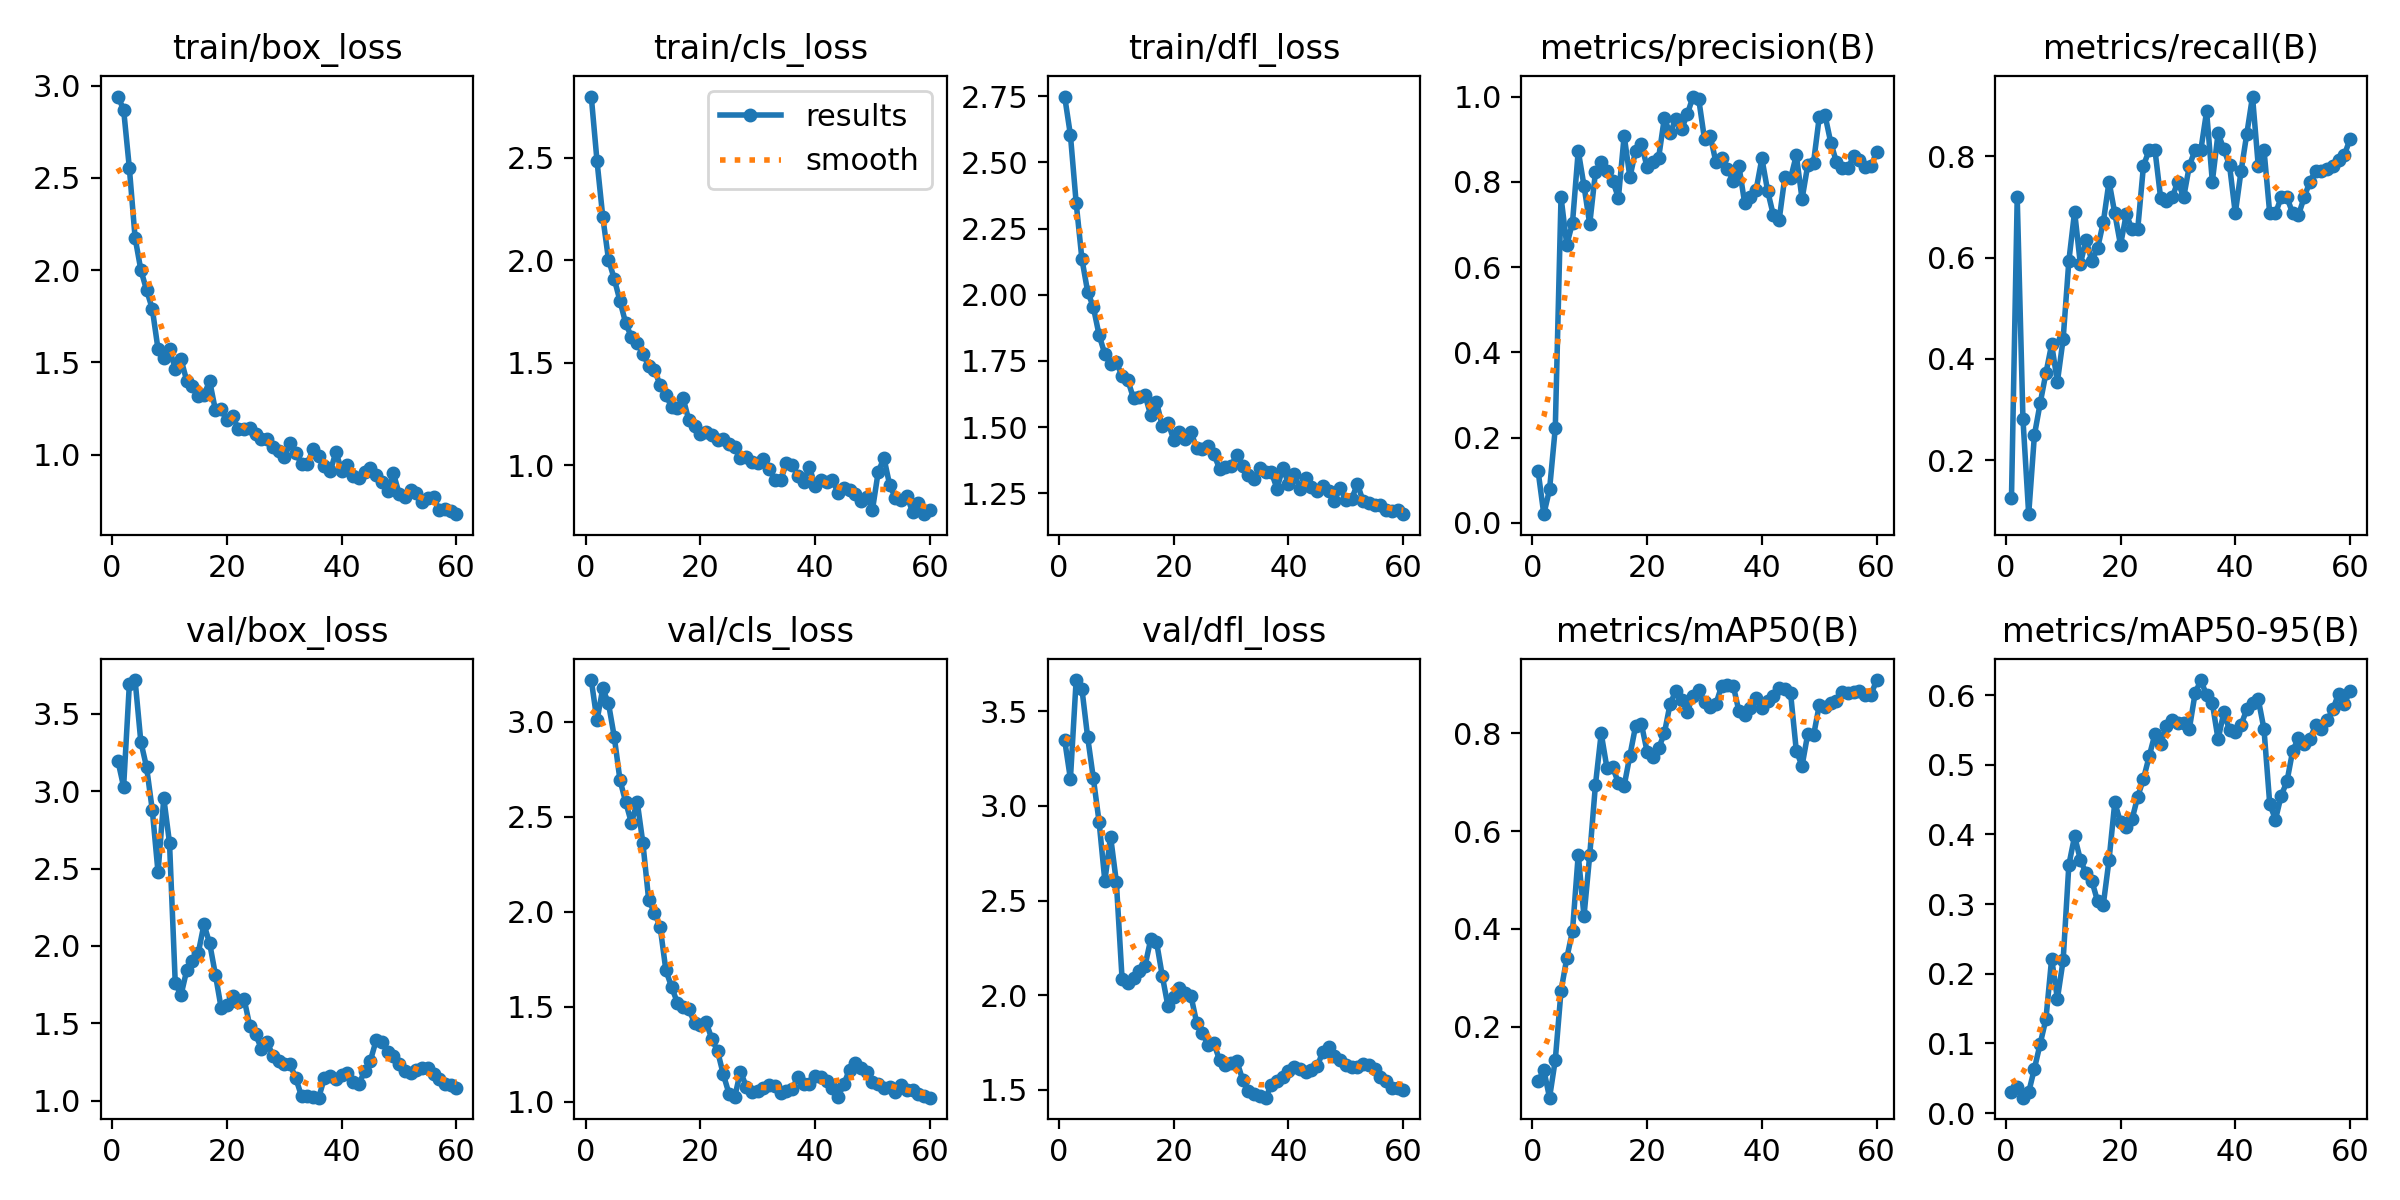

In [33]:
from IPython.display import Image
path = 'training_results/results'

Image(filename=path+'/results.png', width=1200)


The training curves show consistent improvement across all loss components (box, class, DFL) for both training and validation sets, indicating effective learning and good generalization without overfitting. Precision steadily increases and stabilizes above 0.9, while recall improves to around 0.85, suggesting that the model is both accurate and able to detect most true positives. Overall, the model demonstrates robust and well-balanced detection capabilities for the task.

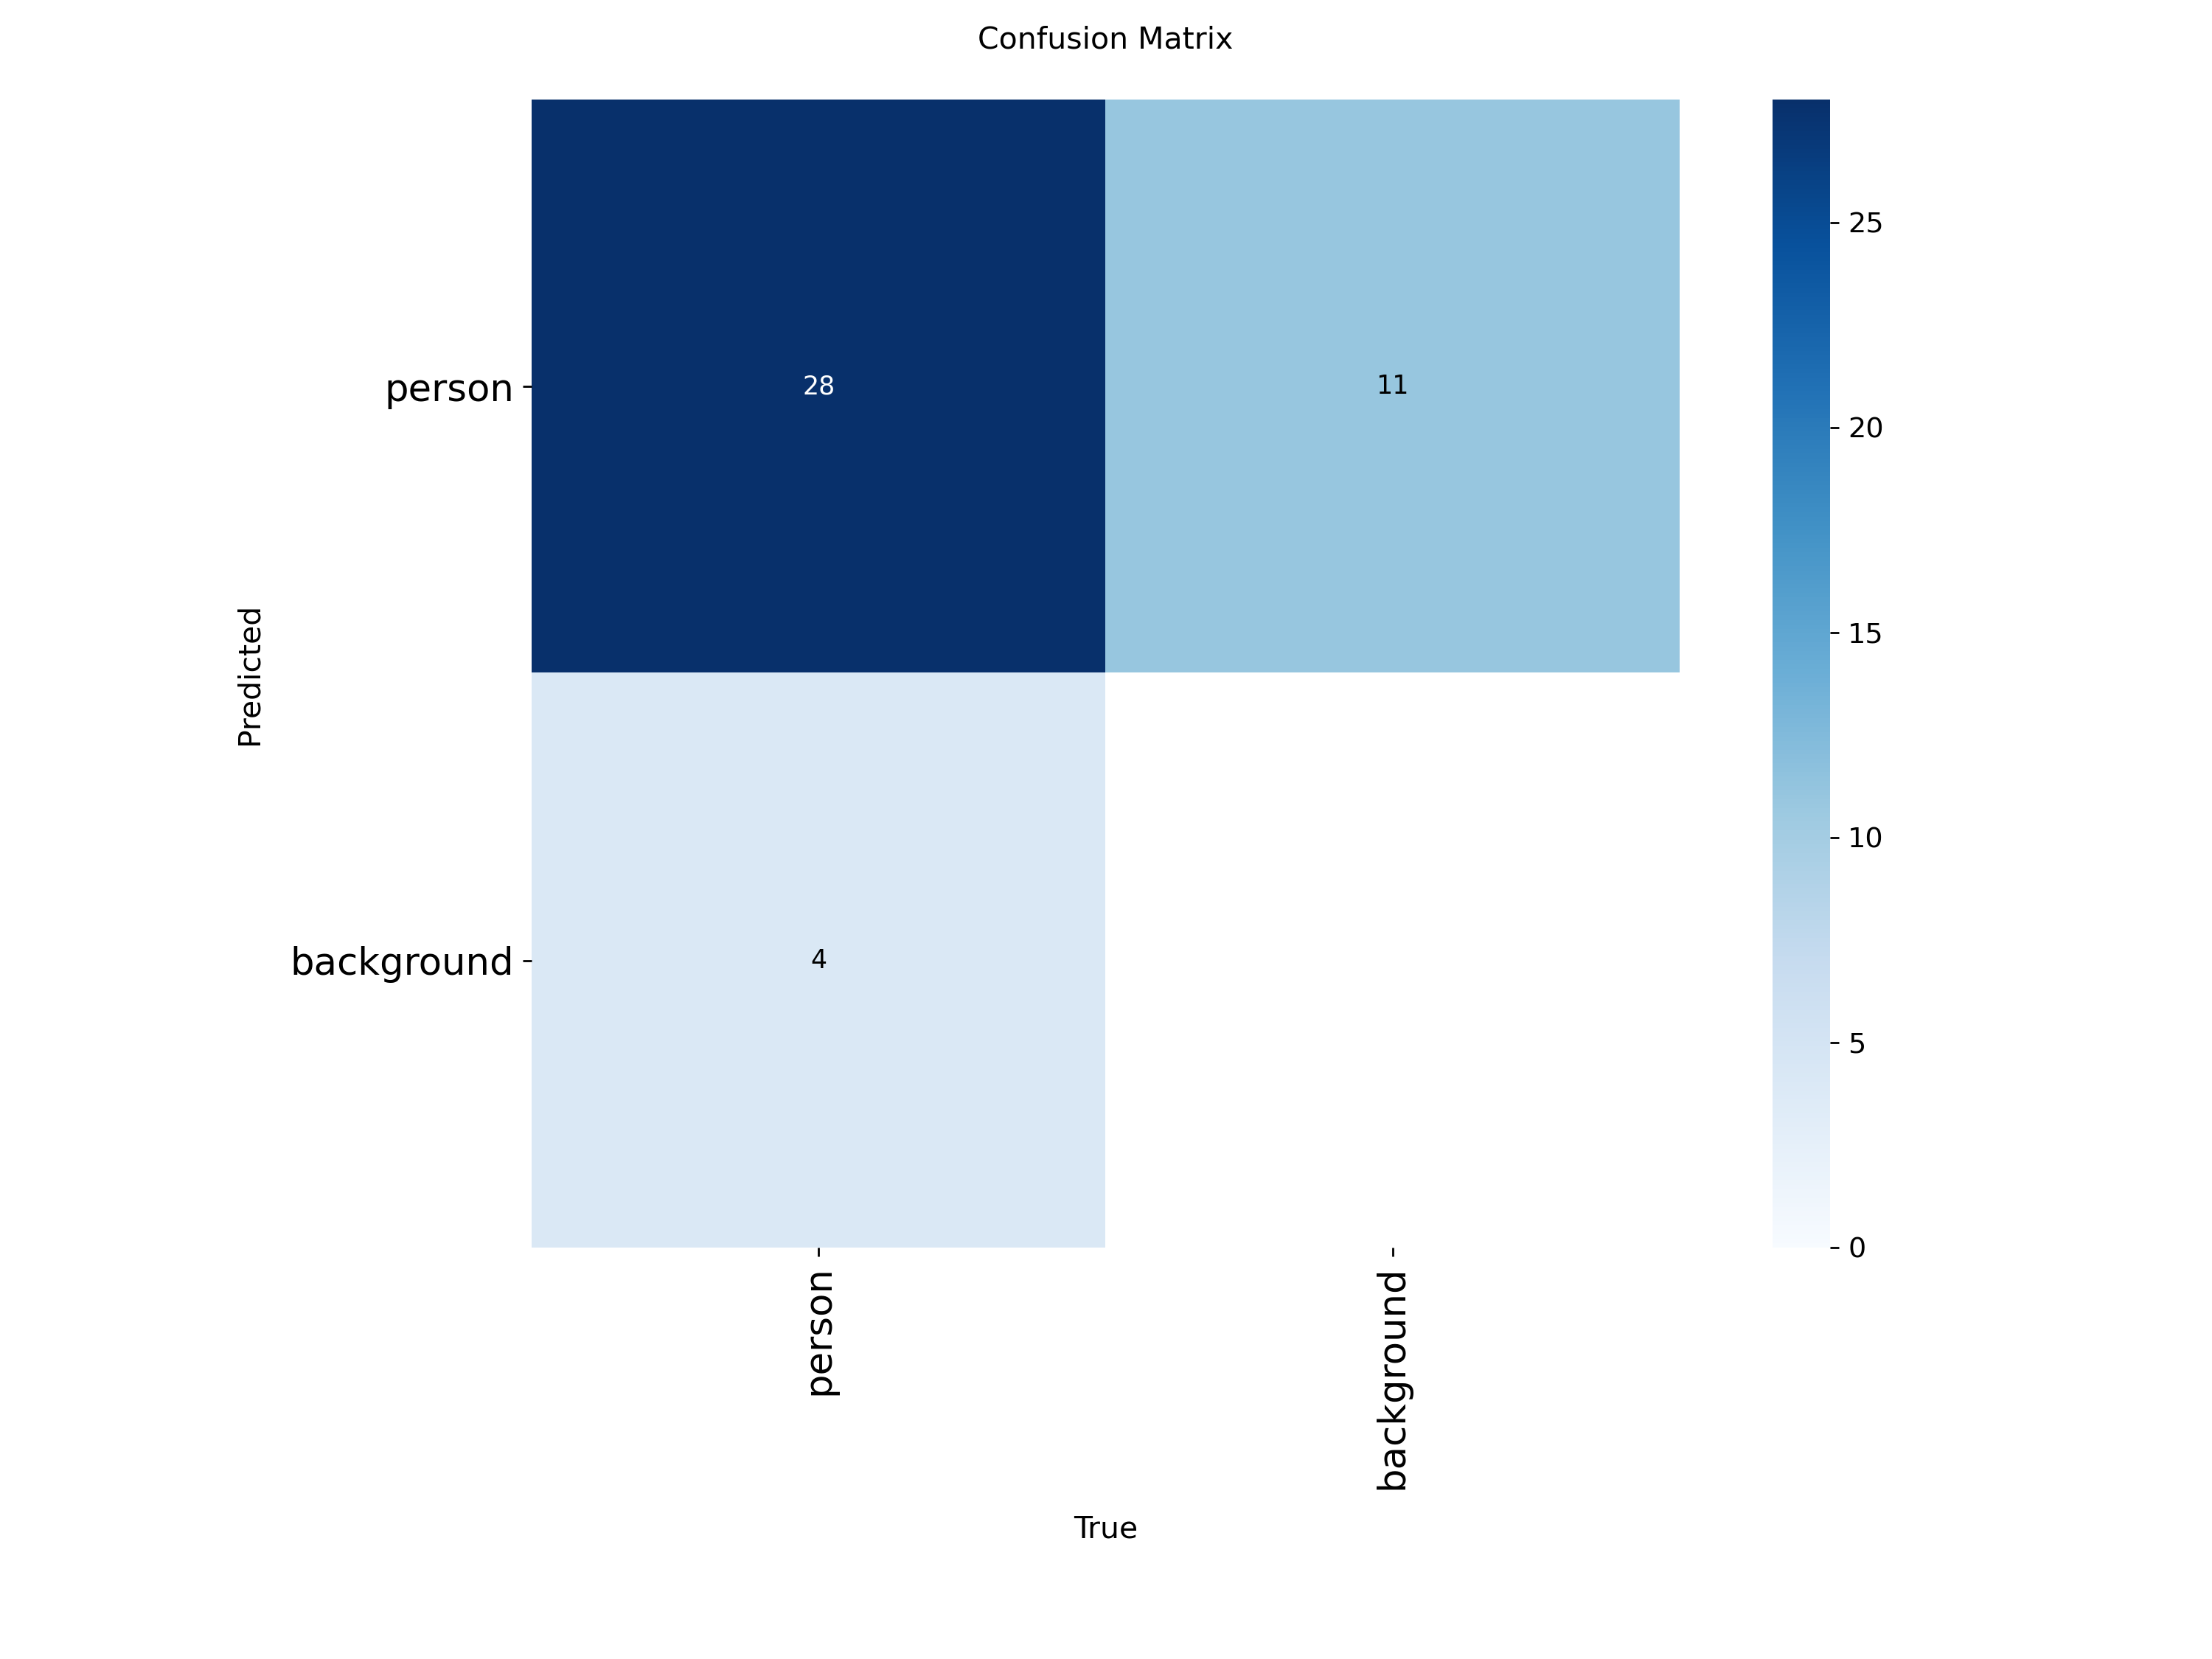

In [35]:
from IPython.display import Image

Image(filename=path+'/confusion_matrix.png', width=1000)


**Testing**

We use the conf threshold (0.74) to ensure that only detections with sufficient confidence are displayed. This helps show bounding boxes only when the model is reasonably certain about the presence of our target object (people)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Eyes Project 4 v1/test/images/Screenshot-2025-06-12-202234_png.rf.c3ddca31140d1159e36c4dd03afc1d0d.jpg: 640x640 1 person, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Eyes Project 4 v1/test/images/Screenshot-2025-06-12-202321_png.rf.e99d8b4497f37510ae00cf259b49c75d.jpg: 640x640 1 person, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Eyes Project 4 v1/test/images/Screenshot-2025-06-12-200622_png.rf.d26c3f5be6e59c719358eaea4dc43e9d.jpg: 640x640 1 person, 17.7ms
Speed: 2.6ms preprocess, 17.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Eyes Project 4 v1/test/images/Screenshot

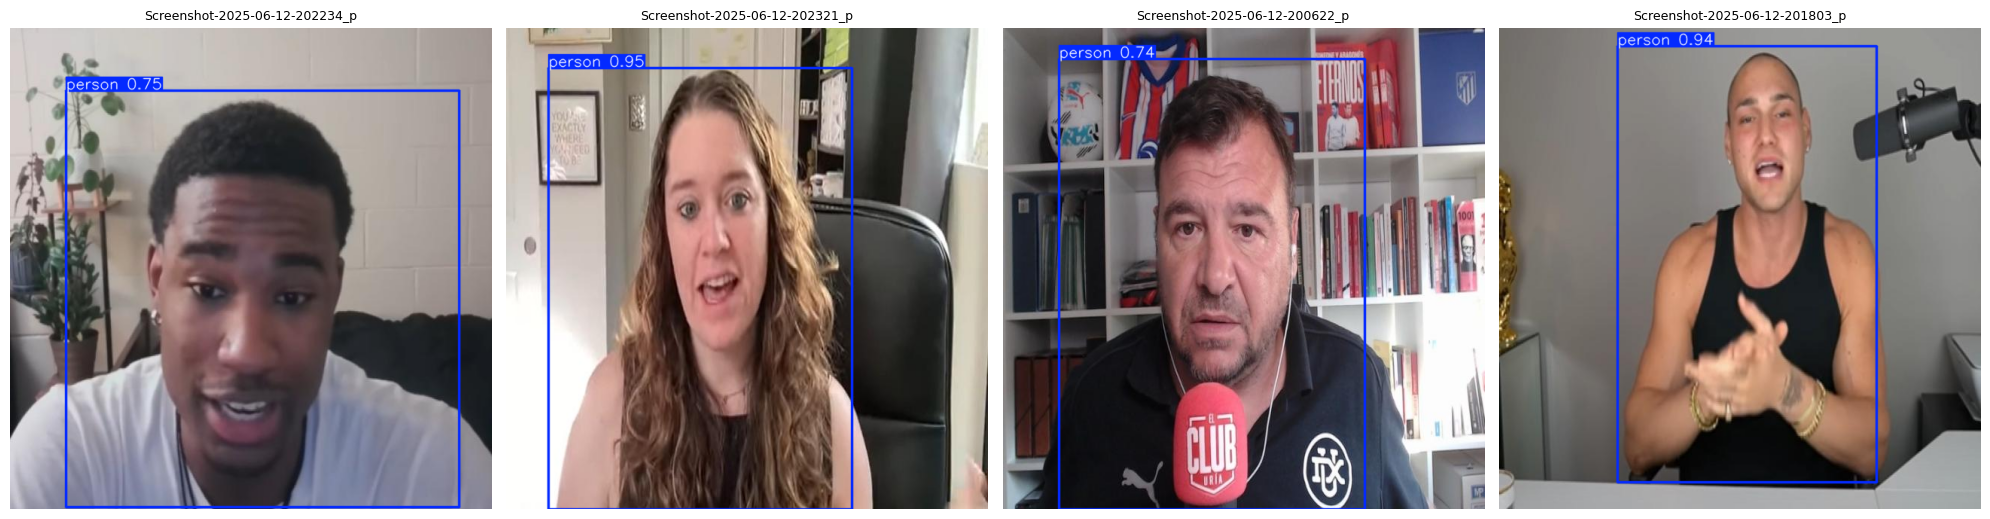

In [53]:
import os, random
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# Path to the folder containing new/unseen images
image_folder= 'models/datasets/Eyes Project 4 v1/test/images'

# Load the trained YOLO model
model = YOLO('models/pretrained/best.pt')


# Select N random images
n = 4
image_list = random.sample(os.listdir(image_folder), min(n, len(os.listdir(image_folder))))

# Set up the grid size and figure size
cols = 4
rows = (n + cols - 1) // cols
plt.figure(figsize=(20, 12))  # Increase to make images larger

# Run inference and plot results
for i, img_name in enumerate(image_list):
    img_path = os.path.join(image_folder, img_name)

    results = model.predict(
        source=img_path,
        conf=0.70,
        save=False,
        show=False,
        line_width=1,
    )[0]

    image_rgb = results.plot()[..., ::-1]  # Convert BGR to RGB

    plt.subplot(rows, cols, i + 1)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(img_name[:30], fontsize=9)

plt.tight_layout()
plt.show()

Additional Images


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Additional Images/Screenshot 2025-06-14 at 22.38.05.png: 352x640 4 persons, 51.7ms
Speed: 2.3ms preprocess, 51.7ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Additional Images/Screenshot 2025-06-14 at 22.38.56.png: 416x640 1 person, 47.8ms
Speed: 2.7ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/Eyes/Additional Images/Screenshot 2025-06-14 at 22.39.24.png: 320x640 2 persons, 46.0ms
Speed: 2.1ms preprocess, 46.0ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)


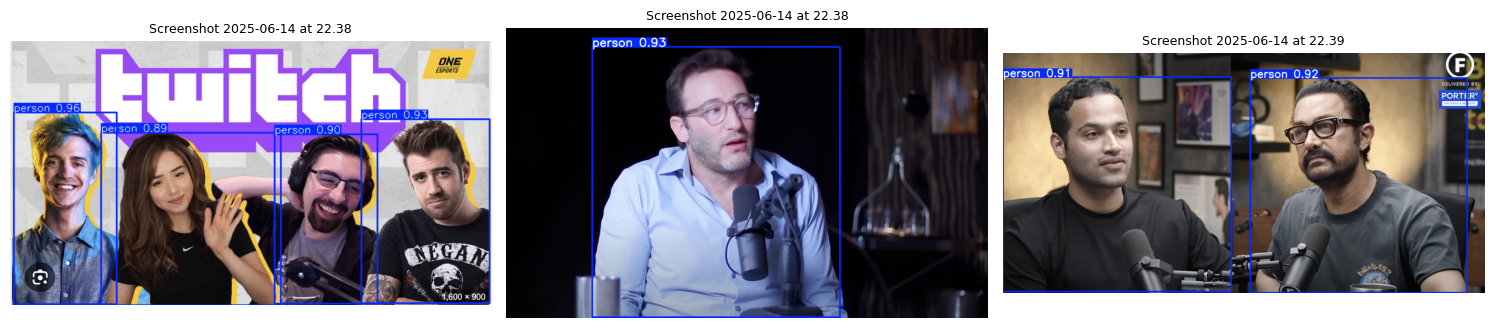

In [54]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

image_folder = 'models/datasets/additional_images'


image_list = sorted([
    img for img in os.listdir(image_folder)
    if img.lower().endswith(('.jpg', '.jpeg', '.png'))
])

cols = 4
rows = (len(image_list) + cols - 1) // cols
plt.figure(figsize=(20, 5 * rows))

for i, img_name in enumerate(image_list):
    img_path = os.path.join(image_folder, img_name)

    results = model.predict(
        source=img_path,
        conf=0.70,
        save=False,
        show=False,
        line_width=1,
    )[0]

    image_rgb = results.plot()[..., ::-1]

    plt.subplot(rows, cols, i + 1)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(img_name[:30], fontsize=9)

plt.tight_layout()
plt.show()
